In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [76]:
df = pd.read_csv('archive/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [77]:
# find out which column has the most na values
most_na = df.isna().sum()
most_na.sort_values(ascending=False)

death_city              421
death_country           415
death_date              404
organization_country    265
organization_city       265
organization_name       264
motivation               88
birth_city               36
birth_date               32
birth_country            31
sex                      30
category                  0
full_name                 0
laureate_type             0
laureate_id               0
prize_share               0
prize                     0
year                      0
dtype: int64

In [78]:
# drop the columns that have the most NAN values
df_dropped = df.drop(['death_city', 'death_country', 'death_date'], axis=1)
df_dropped

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN


In [79]:
# use test statistic to prove that number of male is significantly higher than female
df_dropped['sex'].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

In [80]:
# number of male and female laureats each year in line plot
num_gender_year = df_dropped.groupby(['year', 'sex']).size().unstack(fill_value=0)
num_gender_year

sex,Female,Male
year,,
1901,0,6
1902,0,7
1903,1,6
1904,0,5
1905,1,4
...,...,...
2019,1,13
2020,4,7
2021,1,12


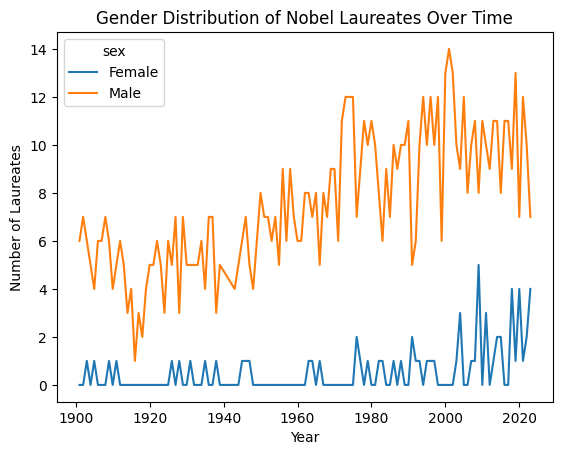

In [81]:
num_gender_year.plot(kind='line')
plt.title('Gender Distribution of Nobel Laureates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Laureates')
plt.show()

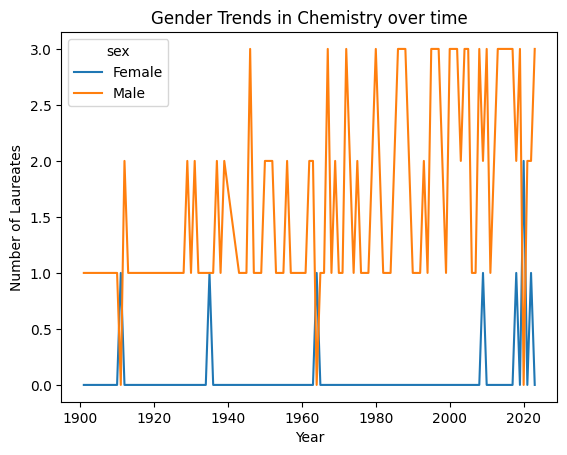

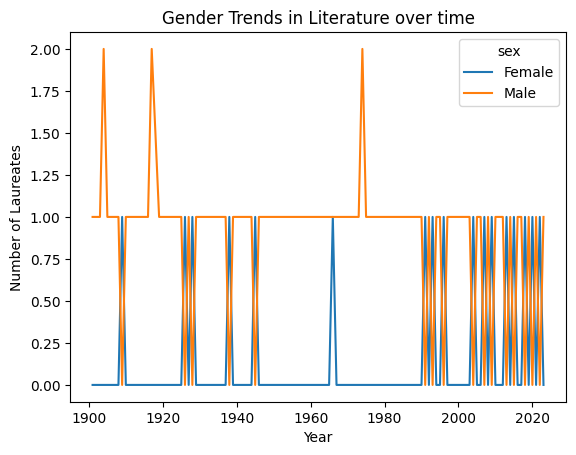

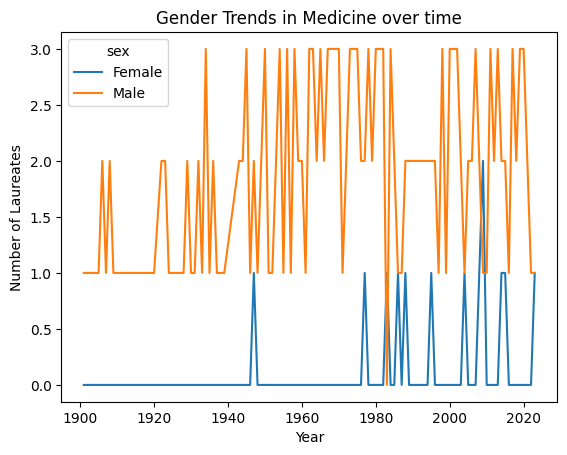

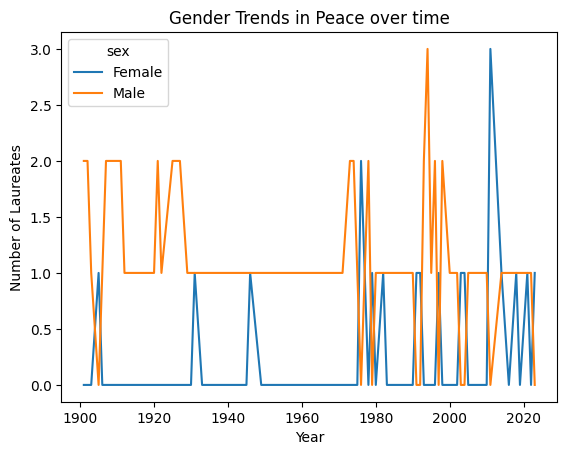

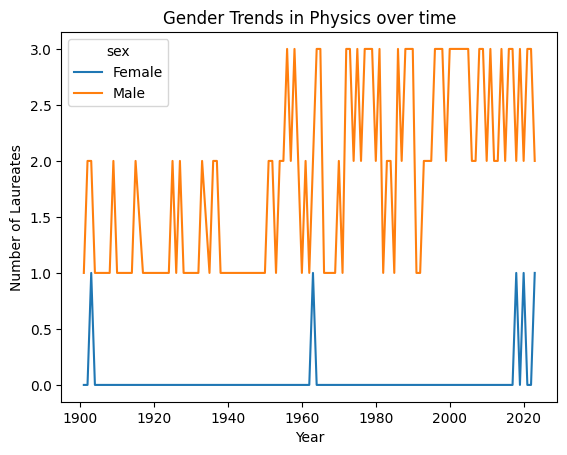

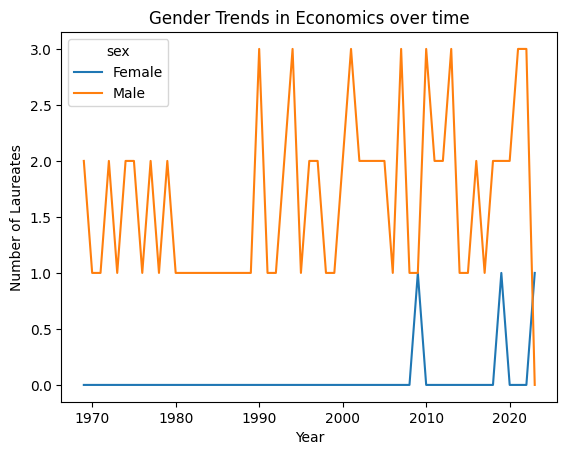

In [82]:
# type of prize and getnder trends over time
unique_category = list(df['category'].unique())

for category in unique_category:
    df_category = df[df['category'] == category]
    gender_category_time = df_category.groupby(['year', 'sex']).size().unstack(fill_value=0)
    gender_category_time.plot(kind='line')
    plt.title(f'Gender Trends in {category} over time')
    plt.ylabel('Number of Laureates')
    plt.xlabel('Year')
    plt.show()

In [84]:
# Assuming 'df' is your DataFrame and contains a 'sex' column with 'Male' and 'Female' values
# Aggregate the total counts of male and female laureates
observed = df['sex'].value_counts()

# Assuming gender equality, the expected frequencies would ideally be equal for both genders
# However, in real analysis, expected ratios could be adjusted based on known eligible populations
expected = [observed.sum() / 2, observed.sum() / 2]

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency([observed, expected])

print(f"Chi-squared Statistic: {chi2}, P-value: {p_value}")

Chi-squared Statistic: 445.50469587965995, P-value: 6.861656148752313e-99


In [85]:
# Assuming 'df' is your DataFrame containing the Nobel Prize data
# Calculate observed frequencies
observed_frequencies = df.groupby(['category', 'sex']).size().unstack(fill_value=0)

results = {}
for category in observed_frequencies.index:
    observed = observed_frequencies.loc[category].values
    # Calculate the expected frequencies for a fair distribution
    # Here we assume the total counts should be evenly split across genders
    total = observed.sum()
    expected = np.array([total / 2, total / 2])
    
    # Perform the chi-squared test using the corrected shape for expected frequencies
    chi2, p_value, dof, _ = chi2_contingency(np.array([observed, expected]))
    results[category] = p_value

# For the overall chi-squared test across all categories
chi2_overall, p_value_overall, dof_overall, _ = chi2_contingency(observed_frequencies)

print("P-Value for Overall Gender Disparity:", p_value_overall)
print("P-Values for Each Category:\n", results)

P-Value for Overall Gender Disparity: 7.855336377892735e-08
P-Values for Each Category:
 {'Chemistry': 8.673648325651831e-24, 'Economics': 1.7710323284692774e-12, 'Literature': 6.32783747491357e-09, 'Medicine': 2.096297293861613e-25, 'Peace': 4.516094921173879e-07, 'Physics': 2.9656902860613777e-30}


In the initial analysis, which looks at the overall distribution of Nobel Prize laureates between males and females across all categories, it is observed that males have a significantly higher number of awards than females. The Chi-suared test gave us a p-value with extremely low value, 6.86e-99, indicating the extreme gender disparity. This disparity is highly unlikely to occur by chance under the null hypothesis (where the probability of being male or female is equal). The line plot comparing male and female laureates across all categories further supports this finding, with males consistently outnumbering females.

From the second analysis, which focuses on the distribution within specific Nobel Prize categories, supports the finding of the first analysis, predominance of male laureates in Nobel Prizes. Notably, the Peace category exhibits a somewhat smaller degree of disparity compare to others but not even close to reject the null hypothesis, with the p-value of 4.51e-07. While still indicating a significant imbalance, this value is larger than those of other categories, particularly Physics, which shows the greatest disparity with a p-value of 2.96e-30. The line plots further illustrate the gender-based inequities in laureate numbers, highlighting the gender disparity in the awarding of Nobel Prizes.

However, both analyses also shows a trend towards an increasing number of female laureates over time. Initially, there were scarcely any female laureates before the 2000, but the data show increase in female Nobel Prize awards in subsequent years. This positive trend indicates gradual progress towards gender parity among Nobel laureates.

False